In [1]:
# NH3 Qualitative Analysis

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [3]:
nh3_nc = xr.load_dataset('../../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc') # Copernicus (0.1°x0.1°)

In [4]:
nh3 = nh3_nc.agl

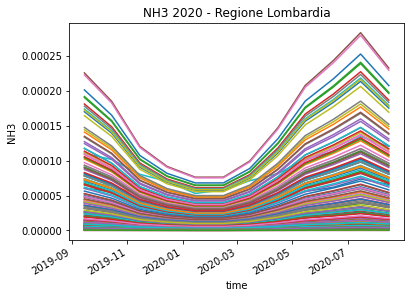

In [5]:
for i in range(len(nh3.lat)):
    for j in range(len(nh3.lon)):
        nh3[:, i, j][-12:].plot()

plt.title('NH3 2020 - Regione Lombardia')
plt.xlabel('time')
plt.ylabel('NH3')
plt.show()

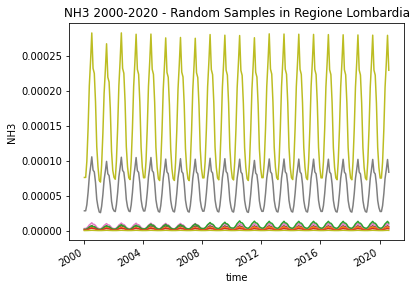

In [6]:
for i in range(0, len(nh3.lat), 6):
    for j in range(0, len(nh3.lon), 6):
        nh3[:, i, j].plot()

plt.title('NH3 2000-2020 - Random Samples in Regione Lombardia')
plt.xlabel('time')
plt.ylabel('NH3')
plt.show()

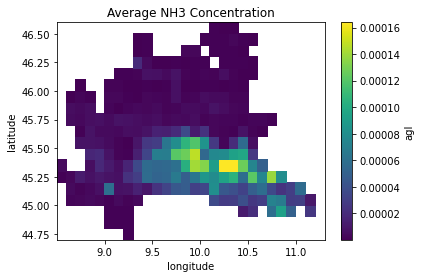

In [7]:
nh3.mean(dim='time').plot()
plt.title('Average NH3 Concentration')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

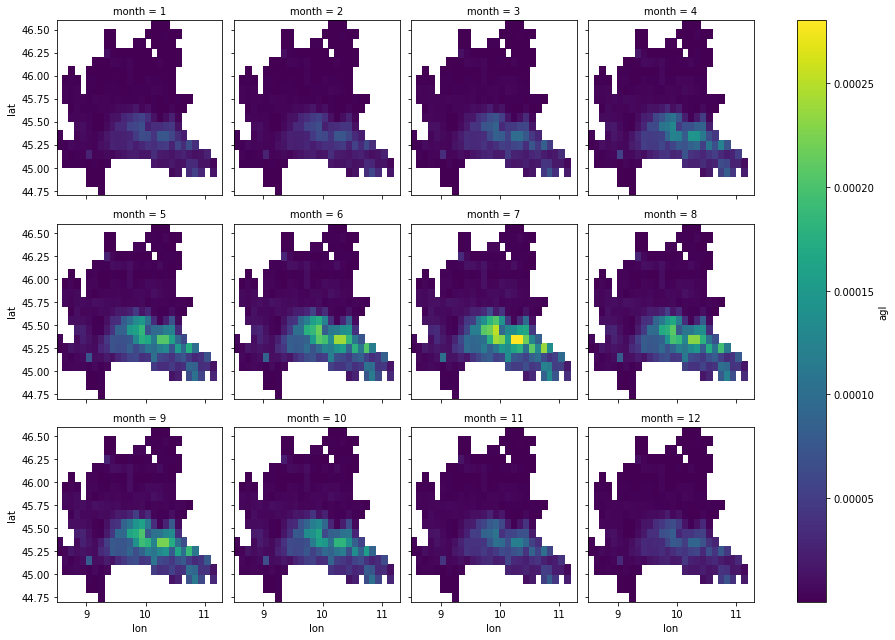

In [8]:
nh3.groupby('time.month').mean().plot(col='month', col_wrap=4)
plt.show()

In [9]:
shape = gpd.read_file('../../resources/regione/regione_2015.shp')
shape.to_crs(epsg=4326, inplace=True)

In [10]:
# Find the point with the max average NH3 concentration
max_coords = nh3.mean(dim='time').argmax(dim=['lat', 'lon'])
max_lat = max_coords['lat'].values
max_lon = max_coords['lon'].values

lats = [round(lat, 2) for lat in nh3.lat.to_series().tolist()]
lons = [round(lon, 2) for lon in nh3.lon.to_series().tolist()]

In [11]:
min_coords = nh3.mean(dim='time').argmin(dim=['lat', 'lon'])
min_lat = min_coords['lat'].values
min_lon = min_coords['lon'].values

In [12]:
mean_values = nh3.mean(dim='time')
mean_value = np.mean(mean_values)
epsilon = 1e-5

mean_coords = []

for lat_idx, lat in enumerate(mean_values.lat.to_series().tolist()):
    for lon_idx, lon in enumerate(mean_values.lat.to_series().tolist()):

        if not np.isnan(mean_values[lat_idx, lon_idx]):

            if np.absolute(float(mean_values[lat_idx, lon_idx].values) - float(mean_value)) < epsilon:
                mean_coords = (lat_idx, lon_idx)
                break

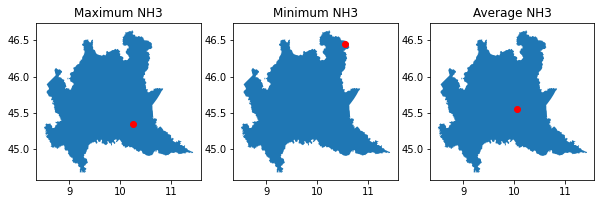

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(10, 20))

shape.plot(ax=axs[0])
axs[0].scatter(lons[max_lon], lats[max_lat], c='r')
axs[0].set_title('Maximum NH3')

shape.plot(ax=axs[1])
axs[1].scatter(lons[min_lon], lats[min_lat], c='r')
axs[1].set_title('Minimum NH3')

shape.plot(ax=axs[2])
axs[2].scatter(lons[mean_coords[0]], lats[mean_coords[1]], c='r')
axs[2].set_title('Average NH3')

plt.show()

In [14]:
# Print coordinates of the three points
print("MAX: lat(" + str(lats[max_lat]) + " " + str (max_lat) + ") lon(" + str(lons[max_lon]) + " " + str (max_lon) + ")")
print("AVG: lat(" + str(lats[mean_coords[1]]) + " " + str (mean_coords[1]) + ") lon(" + str(lons[mean_coords[0]]) + " " + str (mean_coords[0]) + ")")
print("MIN: lat(" + str(lats[min_lat]) + " " + str (min_lat) + ") lon(" + str(lons[min_lon]) + " " + str (min_lon) + ")")

MAX: lat(45.35 6) lon(10.25 17)
AVG: lat(45.55 8) lon(10.05 15)
MIN: lat(46.45 17) lon(10.55 20)


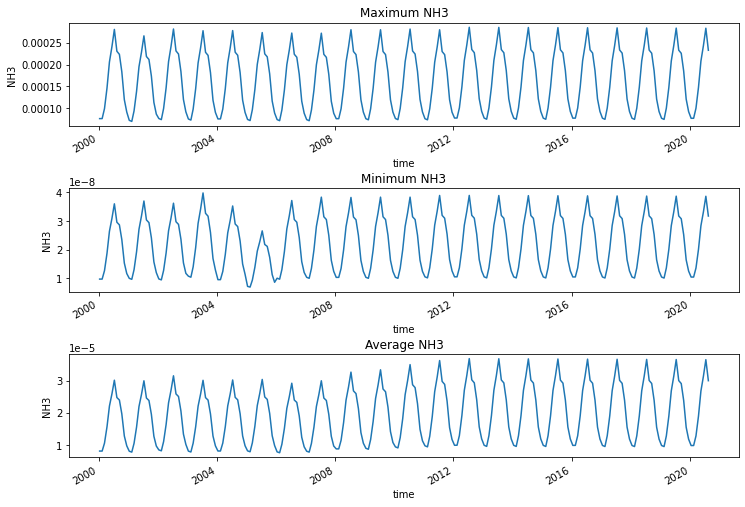

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

nh3[:, max_lat, max_lon].plot(ax=axs[0])
axs[0].set_title('Maximum NH3')
axs[0].set_ylabel('NH3')

nh3[:, min_lat, min_lon].plot(ax=axs[1])
axs[1].set_title('Minimum NH3')
axs[1].set_ylabel('NH3')

nh3[:, mean_coords[0], mean_coords[1]].plot(ax=axs[2])
axs[2].set_title('Average NH3')
axs[2].set_ylabel('NH3')

fig.subplots_adjust(hspace=0.6)

plt.show()

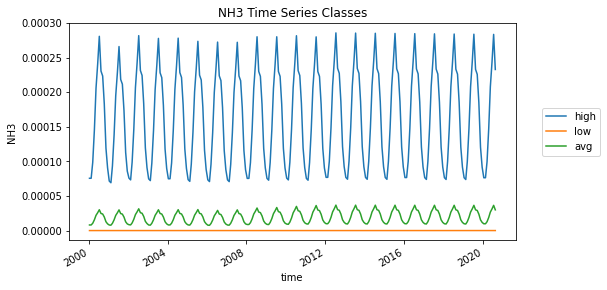

In [16]:
fig = plt.figure(figsize=(8,4))

nh3[:, max_lat, max_lon].plot(label='high')
nh3[:, min_lat, min_lon].plot(label='low')
nh3[:, mean_coords[0], mean_coords[1]].plot(label='avg')

plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.title('NH3 Time Series Classes')
plt.ylabel('NH3')

plt.show()

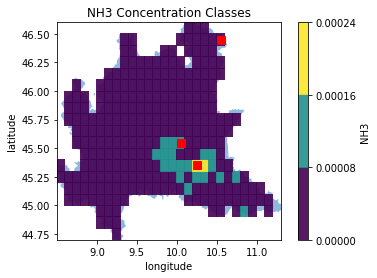

In [17]:
shape.plot(alpha=0.5)
mean_values.plot(alpha=0.9, levels=3, cbar_kwargs={'label': 'NH3'},)
plt.plot(lons[mean_coords[0]], lats[mean_coords[1]], 'rs', ms=8)
plt.plot(lons[min_lon], lats[min_lat], 'rs', ms=8)
plt.plot(lons[max_lon], lats[max_lat], 'rs', ms=8)

plt.title('NH3 Concentration Classes')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

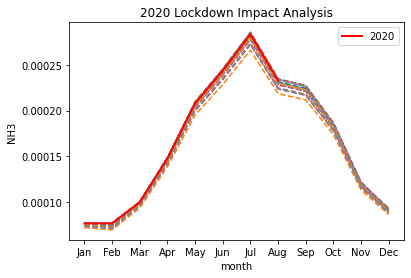

In [18]:
import datetime

nh3_ts = nh3[:, max_lat, max_lon]
nh3_ts_before_lockdown = nh3_ts[:240]
nh3_ts_after_lockdown = nh3_ts[240:252]

months = [datetime.date(2020, i, 1).strftime('%b') for i in range(1,13)]
plt.xticks(list(range(0,12)), months)
plt.title('2020 Lockdown Impact Analysis')
plt.xlabel('month')
plt.ylabel('NH3')

for i in range(18):
    plt.plot(nh3_ts_before_lockdown.values[12*i:(i+1)*12], '--')

plt.plot(nh3_ts_after_lockdown.values[:], 'r-', linewidth=2, label='2020')
plt.legend()

plt.show()

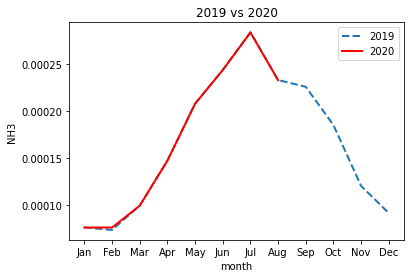

In [19]:
# Dati emulati, 2020-12-15 è nel futuro
import datetime

nh3_ts = nh3[:, max_lat, max_lon]
nh3_ts_2019 = nh3_ts[228:240]
nh3_ts_2020 = nh3_ts[240:252]

months = [datetime.date(2020, i, 1).strftime('%b') for i in range(1,13)]
plt.xticks(list(range(0,12)), months)
plt.title('2019 vs 2020')
plt.xlabel('month')
plt.ylabel('NH3')

plt.plot(nh3_ts_2019.values[:], '--', linewidth=2, label='2019')
plt.plot(nh3_ts_2020.values[:], 'r-', linewidth=2, label='2020')
plt.legend()

plt.show()

In [20]:
# Dati emulati, 2020-12-15 è nel futuro
print("Values 2019-12: ", nh3_ts[239:240].values, ", 2020-12: ", nh3_ts[251:252].values)
print("Values 2019-11: ", nh3_ts[238:239].values, ", 2020-11: ", nh3_ts[250:251].values)

Values 2019-12:  [9.17315047e-05] , 2020-12:  []
Values 2019-11:  [0.00012049] , 2020-11:  []
